In [23]:
import geopandas as gpd
import rioxarray as rxr
import matplotlib.pyplot as plt

from streamkit import (
    vectorize_streams,
    flow_accumulation_workflow,
    vector_streams_to_networkx,
    strahler_order,
    upstream_length,
    networkx_to_gdf,
    label_mainstem)

In [17]:
streams = rxr.open_rasterio("data/sample_streams.tif", masked=True).squeeze()
dem = rxr.open_rasterio("data/sample_dem.tif", masked=True).squeeze()
conditioned_dem, flow_directions, flow_accumulation = flow_accumulation_workflow(dem)

In [43]:
streams_vec = vectorize_streams(streams, flow_directions, flow_accumulation)

<Axes: >

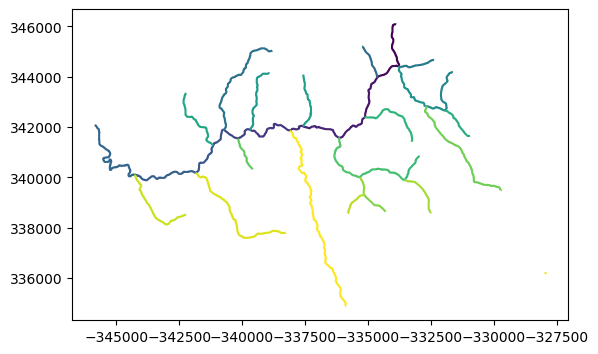

In [19]:
streams_vec.plot(column='stream_id')

In [20]:
graph = vector_streams_to_networkx(streams_vec)

In [21]:
graph = strahler_order(graph)
graph = upstream_length(graph)
graph = label_mainstem(graph)

In [26]:
streams_vec = networkx_to_gdf(graph)

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

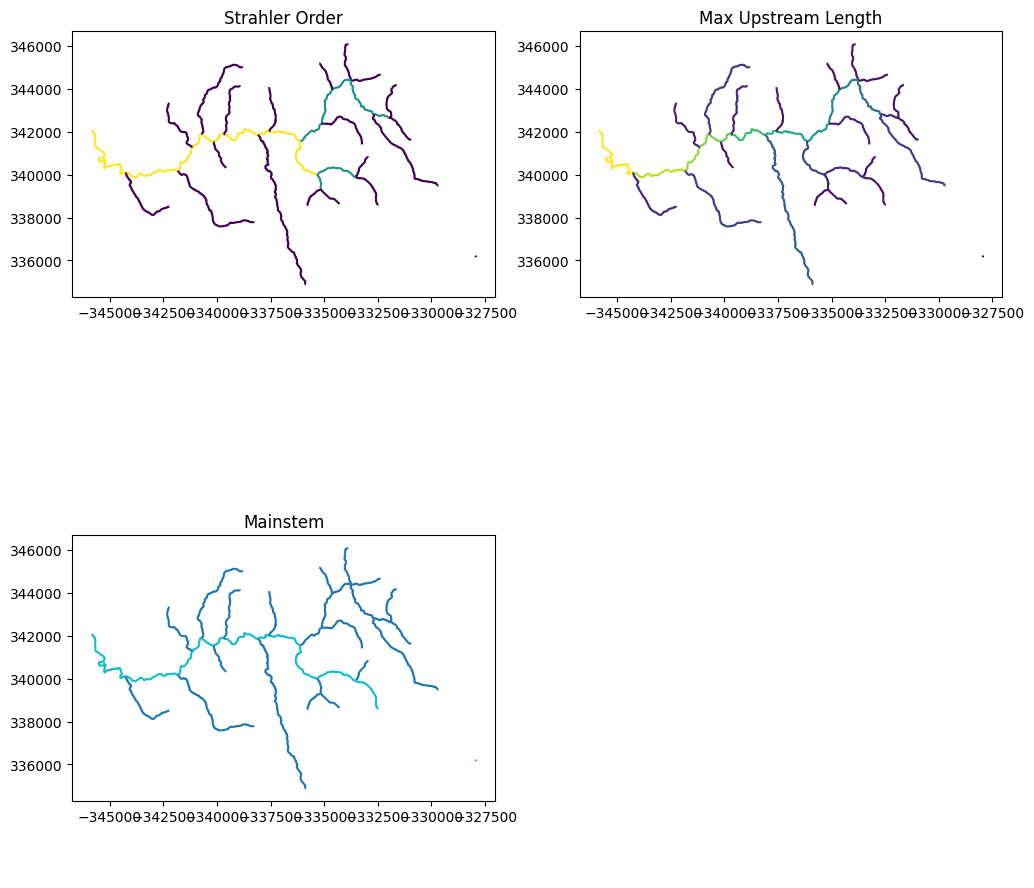

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
streams_vec.plot(ax=axes[0, 0], column='strahler')
axes[0, 0].set_title('Strahler Order')

streams_vec.plot(ax=axes[0, 1], column='max_upstream_length')
axes[0, 1].set_title('Max Upstream Length')

streams_vec.plot(ax=axes[1, 0], column='mainstem')
axes[1, 0].set_title('Mainstem')

axes[1, 1].axis('off')